In [1]:
%load_ext autotime

In [41]:
import sys
sys.path.append('/Users/pradap/Documents/Research/Python-Package/enrique/')

time: 1.5 ms


In [2]:
import magellan as mg
import pandas as pd

DEBUG:Cloud:Log file (/Users/pradap/.picloud/cloud.log) opened


time: 2.38 s


In [3]:
mg.init_jvm()

True

time: 101 ms


In [4]:
wal = mg.read_csv(mg.get_install_path() + '/datasets/books/walmart.csv',
                 dtype={'isbn':pd.np.str, 'pages':pd.np.str, 'volume':pd.np.str, 
                        'editionNum':pd.np.str}, 
                  low_memory=False,
                  key='id'
                 )

time: 1.13 s


In [5]:
bwk = mg.read_csv(mg.get_install_path() + '/datasets/books/bowker.csv',
                  dtype={'isbn':pd.np.str, 'pages':pd.np.str, 'volume':pd.np.str, 
                        'editionNum':pd.np.str}, 
                  low_memory=False,
                  key='id'
                 )

time: 76.4 ms


In [6]:
L = mg.read_csv('label_table_demo_books.csv', ltable=wal, rtable=bwk)

time: 6.31 ms


In [7]:
feature_table = mg.get_features_for_matching(wal, bwk)

time: 3.17 s


In [8]:
f = feature_table.ix[[3,7,18,26, 53]]

time: 1.46 ms


In [9]:
# Extract feature vectors
G = mg.extract_feat_vecs(L, feature_table=f, attrs_after='gold')

time: 374 ms


In [10]:
G.head(10)

,_id,ltable.id,rtable.id,title_title_jac_qgm_3_qgm_3,author_author_jac_qgm_3_qgm_3,binding_binding_jac_qgm_3_qgm_3,publisher_publisher_jac_qgm_3_qgm_3,lang_lang_lev,gold
0,0,4086892,9780226156439,0.785714,1.000000,0,0.518519,1,1
1,1,535599,9780060655808,0.222222,1.000000,0,0.320000,1,1
2,2,1386538,9780130901262,1.000000,0.785714,1,0.733333,1,1
3,3,15280600,9780217455008,0.720000,0.666667,1,1.000000,1,1
4,4,15286798,9780217825382,1.000000,1.000000,1,1.000000,1,1
5,5,15295588,9780217940207,0.308271,0.695652,1,0.083333,1,0
6,6,15334872,9780217270052,1.000000,1.000000,1,1.000000,1,1
7,7,15338150,9780217304399,0.280702,1.000000,1,1.000000,1,1
8,8,1566948,9780070479081,0.822222,0.260870,1,0.303030,1,1
9,9,4564015,9780080446837,1.000000,NaN,1,0.512821,1,0


time: 19.6 ms


In [11]:
G.fillna(0, inplace=True)

time: 1.45 ms


In [12]:
G.head(10)

,_id,ltable.id,rtable.id,title_title_jac_qgm_3_qgm_3,author_author_jac_qgm_3_qgm_3,binding_binding_jac_qgm_3_qgm_3,publisher_publisher_jac_qgm_3_qgm_3,lang_lang_lev,gold
0,0,4086892,9780226156439,0.785714,1.000000,0,0.518519,1,1
1,1,535599,9780060655808,0.222222,1.000000,0,0.320000,1,1
2,2,1386538,9780130901262,1.000000,0.785714,1,0.733333,1,1
3,3,15280600,9780217455008,0.720000,0.666667,1,1.000000,1,1
4,4,15286798,9780217825382,1.000000,1.000000,1,1.000000,1,1
5,5,15295588,9780217940207,0.308271,0.695652,1,0.083333,1,0
6,6,15334872,9780217270052,1.000000,1.000000,1,1.000000,1,1
7,7,15338150,9780217304399,0.280702,1.000000,1,1.000000,1,1
8,8,1566948,9780070479081,0.822222,0.260870,1,0.303030,1,1
9,9,4564015,9780080446837,1.000000,0.000000,1,0.512821,1,0


time: 55 ms


In [13]:
# Create ML matchers
dt = mg.DTMatcher(name='DecisionTree', random_state=0)
svm = mg.SVMMatcher()
rf = mg.RFMatcher(name='RF', random_state=0)
nb = mg.NBMatcher(name='NB')
lg = mg.LogRegMatcher(name='LogReg')
ln = mg.LinRegMatcher(name='LinReg')

time: 2.87 ms


In [14]:
(dt.name, rf.name, svm.name)

('DecisionTree', 'RF', 'SVM_80097700187878256441')

time: 1.95 ms


In [15]:
result = mg.select_matcher([dt, svm, rf, nb, lg], table=G, 
                           exclude_attrs=['_id', 'ltable.id', 'rtable.id', 'gold'],
                          target_attr='gold', metric='precision', random_state=100)

time: 121 ms


In [16]:
result['cv_stats']

,Name,Matcher,Num folds,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Mean score
0,DecisionTree,<magellan.matcher.dtmatcher.DTMatcher object a...,5,0.75,0.875000,1.0,0.600000,0.875000,0.820000
1,SVM_80097700187878256441,<magellan.matcher.svmmatcher.SVMMatcher object...,5,0.60,0.875000,1.0,0.600000,0.857143,0.786429
2,RF,<magellan.matcher.rfmatcher.RFMatcher object a...,5,0.75,0.857143,1.0,0.666667,0.875000,0.829762
3,NB,<magellan.matcher.nbmatcher.NBMatcher object a...,5,0.60,0.888889,0.9,0.600000,0.777778,0.753333
4,LogReg,<magellan.matcher.logregmatcher.LogRegMatcher ...,5,0.75,0.875000,1.0,0.666667,0.777778,0.813889


time: 34.6 ms


In [17]:
train_test = mg.train_test_split(G, train_proportion=0.7, random_state=0)
train = train_test['train']
test = train_test['test']

time: 4.87 ms


In [18]:
mg.vis_debug_dt(dt, train, test, 
        exclude_attrs=['_id', 'ltable.id', 'rtable.id', 'gold'],
        target_attr='gold') 

time: 3.2 s


In [19]:
# Experimental feature - requires installation of graphviz : www.graphviz.org
mg.visualize_tree(dt, G.columns, exclude_attrs=['_id', 'ltable.id', 'rtable.id', 'gold'])

Execute the following command in IPython command prompt:

from IPython.display import Image
Image(filename='dt_.png') 
time: 448 ms


In [20]:
# from IPython.display import Image
# Image(filename='dt_.png') 

time: 970 µs


In [21]:
mg.vis_debug_rf(rf, train, test, 
        exclude_attrs=['_id', 'ltable.id', 'rtable.id', 'gold'],
        target_attr='gold')

time: 2.03 s


In [22]:
mg.visualize_tree(rf.clf.estimators_[2], G.columns, exclude_attrs=['_id', 'ltable.id', 'rtable.id', 'gold'])


Execute the following command in IPython command prompt:

from IPython.display import Image
Image(filename='dt_.png') 
time: 493 ms


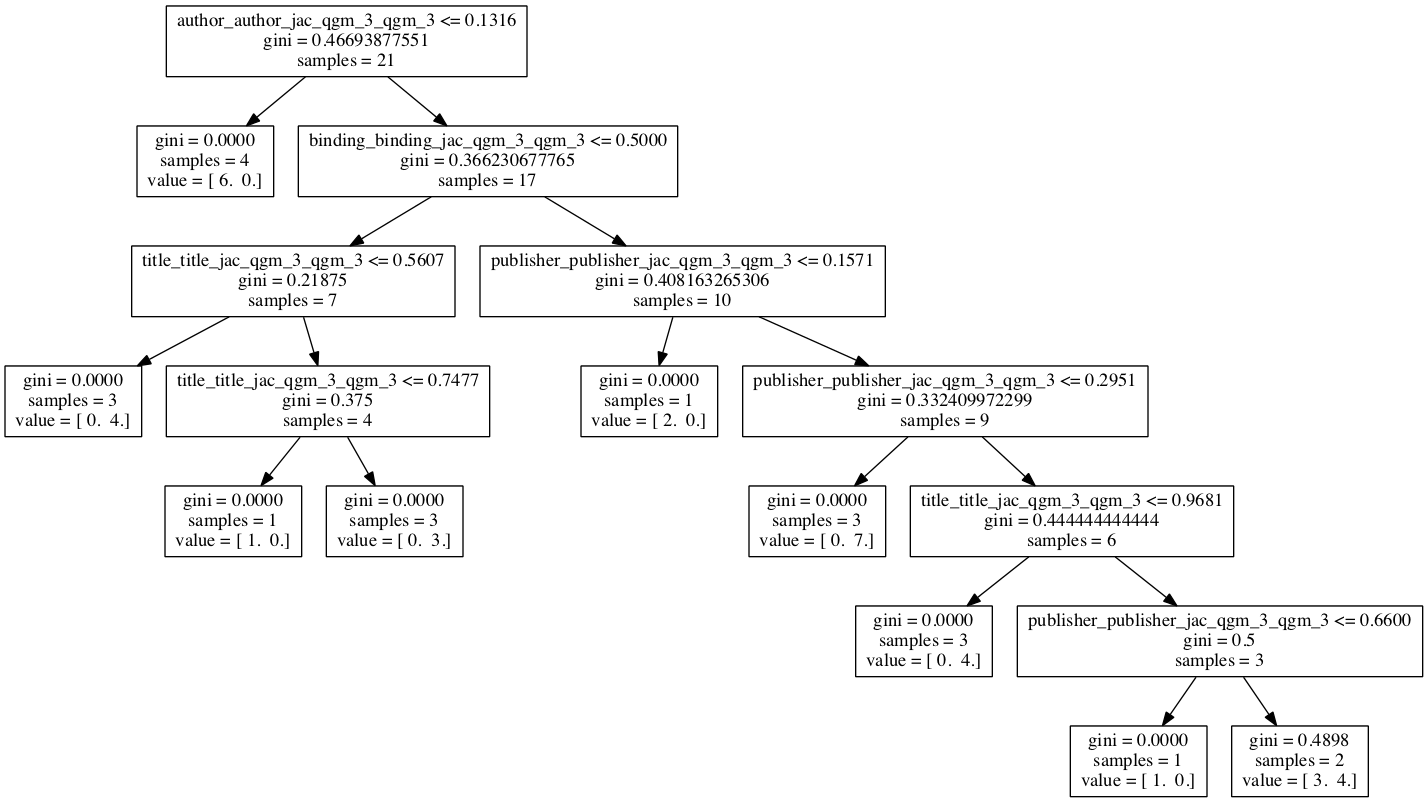

time: 11.1 ms


In [23]:
from IPython.display import Image
Image(filename='dt_.png') 

In [24]:
H = mg.extract_feat_vecs(L, feature_table=feature_table, attrs_after='gold')

time: 742 ms


In [25]:
# select the best ML matcher using CV
result = mg.select_matcher([dt, rf, svm, nb, lg], table=G, 
        exclude_attrs=['_id', 'ltable.id', 'rtable.id', 'gold'],
        target_attr='gold', metric='f1') 

time: 92.5 ms


In [26]:
result['cv_stats']

,Name,Matcher,Num folds,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Mean score
0,DecisionTree,<magellan.matcher.dtmatcher.DTMatcher object a...,5,0.545455,0.833333,0.823529,0.933333,0.875000,0.802130
1,RF,<magellan.matcher.rfmatcher.RFMatcher object a...,5,0.923077,0.800000,0.714286,0.941176,0.857143,0.847136
2,SVM_80097700187878256441,<magellan.matcher.svmmatcher.SVMMatcher object...,5,1.000000,0.800000,0.941176,0.875000,0.750000,0.873235
3,NB,<magellan.matcher.nbmatcher.NBMatcher object a...,5,0.714286,0.888889,0.714286,0.888889,1.000000,0.841270
4,LogReg,<magellan.matcher.logregmatcher.LogRegMatcher ...,5,0.933333,0.875000,0.823529,0.941176,0.933333,0.901275


time: 70.4 ms


In [27]:
train_test = mg.train_test_split(G, train_proportion=0.5, random_state=0)

time: 2.79 ms


In [28]:
nb.fit(table=train_test['train'], exclude_attrs=['_id', 'ltable.id', 'rtable.id', 'gold'],
      target_attr='gold')

time: 9.72 ms


In [29]:
H = nb.predict(table=train_test['test'], 
               exclude_attrs=['_id', 'ltable.id', 'rtable.id', 'gold'],
              target_attr='predicted', append=True, inplace=False)

time: 19.5 ms


In [30]:
H[['gold', 'predicted']]

,gold,predicted
0,1,1
1,1,1
2,0,0
3,0,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


time: 14.3 ms


In [31]:
eval_summary = mg.eval_matches(H, 'gold', 'predicted')

time: 9.87 ms


In [32]:
mg.print_eval_summary(eval_summary)

Precision : 87.5% (21/24)
Recall : 100.0% (21/21)
F1 : 93.33%
False positives : 3 (out of 24 positive predictions)
False negatives : 0 (out of 1 negative predictions)
time: 987 µs


In [33]:
pos_trigger = mg.MatchTrigger()
pos_trigger.add_cond_rule('author_author_lev(ltuple, rtuple) > 0.7', 
                          feature_table=feature_table)
pos_trigger.add_cond_status(True)
pos_trigger.add_action(1)

True

time: 4.36 ms


In [34]:
I = pos_trigger.execute(H, 'predicted', inplace=False)

time: 607 ms


In [35]:
eval_summary = mg.eval_matches(I, 'gold', 'predicted')
mg.print_eval_summary(eval_summary)

Precision : 87.5% (21/24)
Recall : 100.0% (21/21)
F1 : 93.33%
False positives : 3 (out of 24 positive predictions)
False negatives : 0 (out of 1 negative predictions)
time: 22.5 ms


In [36]:
res = mg.cv_matcher_and_trigger(nb, pos_trigger, G, 
                               exclude_attrs=['_id', 'ltable.id', 'rtable.id', 'gold'],
                               target_attr='gold', random_state=10, k=2)

0%  100%
[##] | ETA[sec]: 0.000 

time: 1.47 s



Total time elapsed: 1.457 sec


In [37]:
res['cv_stats']

,Metric,Num folds,Fold 1,Fold 2,Mean score
0,precision,2,0.791667,0.708333,0.750000
1,recall,2,1.000000,1.000000,1.000000
2,f1,2,0.883721,0.829268,0.856495


time: 14.4 ms


In [38]:
neg_trigger = mg.MatchTrigger()
neg_trigger.add_cond_rule(['lang_lang_lev(ltuple, rtuple) > 0.5'],
    feature_table=feature_table)
neg_trigger.add_cond_status(False)
neg_trigger.add_action(0)

True

time: 3.92 ms


In [48]:
res = mg.cv_matcher_and_trigger(nb, [pos_trigger, neg_trigger], G, 
                               exclude_attrs=['_id', 'ltable.id', 'rtable.id', 'gold'],
                               target_attr='gold', random_state=10, k=5)

0%  100%
[#####] | ETA[sec]: 0.000 

time: 4.46 s



Total time elapsed: 4.456 sec


In [49]:
res['cv_stats']

,Metric,Num folds,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Mean score
0,precision,5,0.800000,0.666667,0.900000,0.60,0.777778,0.748889
1,recall,5,1.000000,1.000000,1.000000,1.00,1.000000,1.000000
2,f1,5,0.888889,0.800000,0.947368,0.75,0.875000,0.852251


time: 11.2 ms


In [54]:
fp = mg.get_false_positives_as_df(G, res['fold_stats'][3])

time: 6.94 ms


In [53]:
mg.print_eval_summary(res['fold_stats'][3])

Precision : 60.0% (6/10)
Recall : 100.0% (6/6)
F1 : 75.0%
False positives : 4 (out of 10 positive predictions)
False negatives : 0 (out of 0 negative predictions)
time: 1.35 ms


In [62]:
ab = mg.AttrEquivalenceBlocker()
M = ab.block_tables(wal, bwk, 'isbn', 'isbn', ['title', 'author'], 
                               ['title', 'author'])

time: 170 ms


In [63]:
mg.view(M)

time: 8.45 s


In [65]:
L1 = mg.label_table(M, 'Predicted_1')

time: 16.4 s


In [67]:
L2 = mg.label_table(M, 'Predicted_2')

time: 8.63 s


In [68]:
L = M.copy()

time: 4.41 ms


In [69]:
L['predicted'] = L1['Predicted_1'] + L2 ['Predicted_2']

time: 2.17 ms


In [70]:
mg.view(L)

time: 6.86 s
